In [1]:
import os
os.getcwd()

'c:\\Users\\ebaca\\Desktop\\University of Washington\\3rd Year\\Interacting Galaxies Project'

In [84]:
from funcrefs import PhotAnnulus as phan
from funcrefs import custom_colormap as ccm
from funcrefs import fnrefs as rfs

from astropy.io import fits
import numpy as np

from astropy.stats import SigmaClip
import photutils.background as pb

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

<b>things to do</b>
- FWHM $\rarr$ more on that [here](https://stackoverflow.com/questions/24194238/how-can-i-find-the-fwhm-of-a-peak-in-a-noisy-data-set-in-python-numpy-scipy)
- mean/$\mu$
- std/$\sigma$
- ideas for later: 3d surface plots?



##### loading data

uncalibrated:

In [3]:
unc_pair = {
    'g': rfs.create_stack('NGC 4567/raw data/', keyword = '_g_'),
    'ha': rfs.create_stack('NGC 4567/raw data/', keyword = '_Ha_'),
    'r': rfs.create_stack('NGC 4567/raw data/', keyword = '_r_'),
    'i': rfs.create_stack('NGC 4567/raw data/', keyword = '_i_')
}

unc_m58 = {
    'g': rfs.create_stack('M 58/raw data/', keyword = '_g_'),
    'ha': rfs.create_stack('M 58/raw data/', keyword = '_Ha_'),
    'r': rfs.create_stack('M 58/raw data/', keyword = '_r_')
}

calibrated:

In [4]:
pair = {
    'g': fits.open('NGC 4567/calibrated_g.fits')[0].data,
    'ha': fits.open('NGC 4567/calibrated_ha.fits')[0].data,
    'r': fits.open('NGC 4567/calibrated_r.fits')[0].data,
    'i': fits.open('NGC 4567/calibrated_i.fits')[0].data
}

pair_sfr = pair['r'] - pair['ha']
pair_bkg = pb.Background2D(pair_sfr, box_size=(100, 100), filter_size=(3, 3), sigma_clip=SigmaClip(sigma=3),
                    mask=(pair_sfr == 0), bkg_estimator=pb.MedianBackground())

pair_sfr = pair_sfr - pair_bkg.background

In [5]:
m58 = {
    'g': fits.open('M 58/calibrated_g.fits')[0].data,
    'ha': fits.open('M 58/calibrated_ha.fits')[0].data,
    'r': fits.open('M 58/calibrated_r.fits')[0].data
}

m_sfr = m58['r'] - m58['ha']
m_bkg = pb.Background2D(m_sfr, box_size=(100, 100), filter_size=(3, 3), sigma_clip=SigmaClip(sigma=3),
                    mask=(m_sfr == 0), bkg_estimator=pb.MedianBackground())

m_sfr = m_sfr - m_bkg.background

##### pixel value histogram for each filter

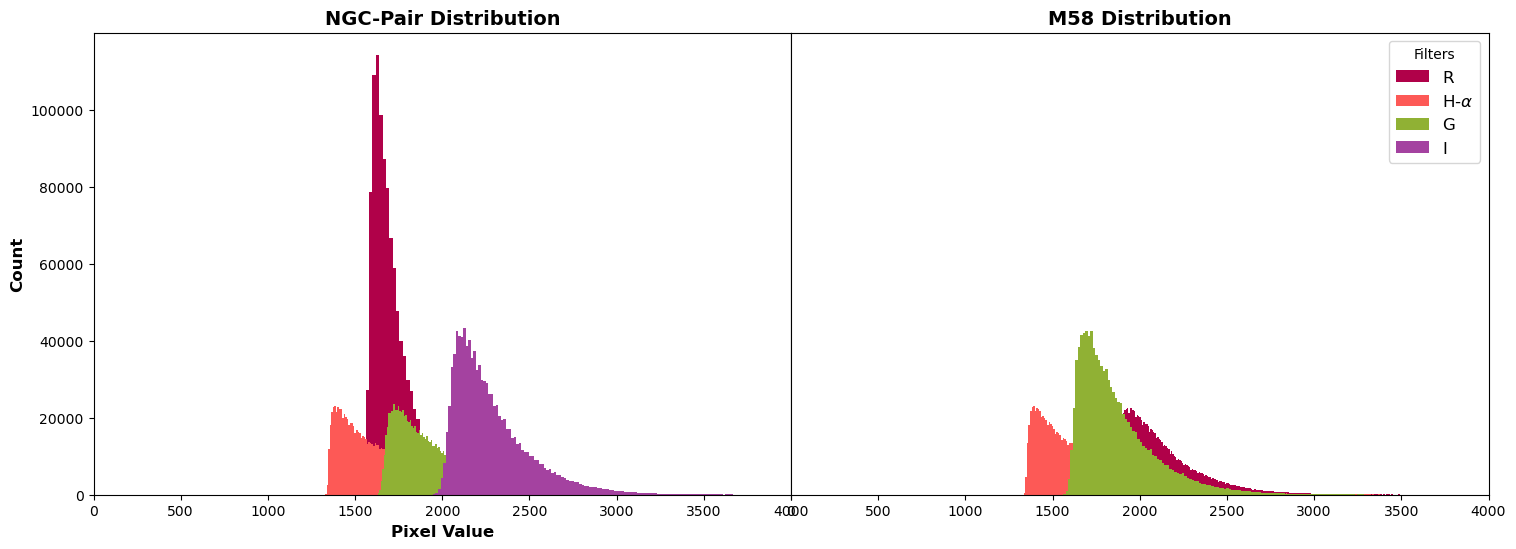

In [98]:
fig = plt.figure(figsize=(18, 6))
gs = GridSpec(1, 6, figure=fig)

ax1 = fig.add_subplot(gs[0, :3])
ax1.set_title(
    'NGC-Pair Distribution', 
        fontsize=14, fontweight='bold')
ax1.hist((unc_pair['r'].flatten()), bins=len(np.unique(unc_pair['r'].flatten()))+1, label='R', color='xkcd:raspberry')
ax1.hist((unc_pair['ha'].flatten()), bins=len(np.unique(unc_pair['ha'].flatten()))+1, label=f'H-$\\alpha$', color='xkcd:grapefruit')
ax1.hist((unc_pair['g'].flatten()), bins=len(np.unique(unc_pair['g'].flatten()))+1, label='G', color='xkcd:avocado')
ax1.hist((unc_pair['i'].flatten()), bins=len(np.unique(unc_pair['i'].flatten()))+1, label='I', color='xkcd:ugly purple')
ax1.set_xlim(0, 4000)
ax1.set_ylabel('Count', fontsize=12, fontweight='bold')
ax1.set_xlabel('Pixel Value', fontsize=12, fontweight='bold')

ax2 = fig.add_subplot(gs[0, 3:], sharey=ax1)
ax2.set_title(
    'M58 Distribution', 
        fontsize=14, fontweight='bold')
ax2.hist(unc_m58['r'].flatten(), bins=len(np.unique(unc_m58['r'].flatten()))+1, color='xkcd:raspberry')
ax2.hist(unc_m58['ha'].flatten(), bins=len(np.unique(unc_m58['ha'].flatten()))+1, color='xkcd:grapefruit')
ax2.hist(unc_m58['g'].flatten(), bins=len(np.unique(unc_m58['g'].flatten()))+1, color='xkcd:avocado')
ax2.set_xlim(0, 4000)
ax2.tick_params(axis='y', which='both', left=False, labelleft=False)

fig.subplots_adjust(wspace=0, hspace=0)
fig.legend(title='Filters', loc='upper right', bbox_to_anchor=(0.9, 0.88), fontsize=12);

##### color values for single array

'\nideas: change to 3d surface plot? idk looks cooler\n'

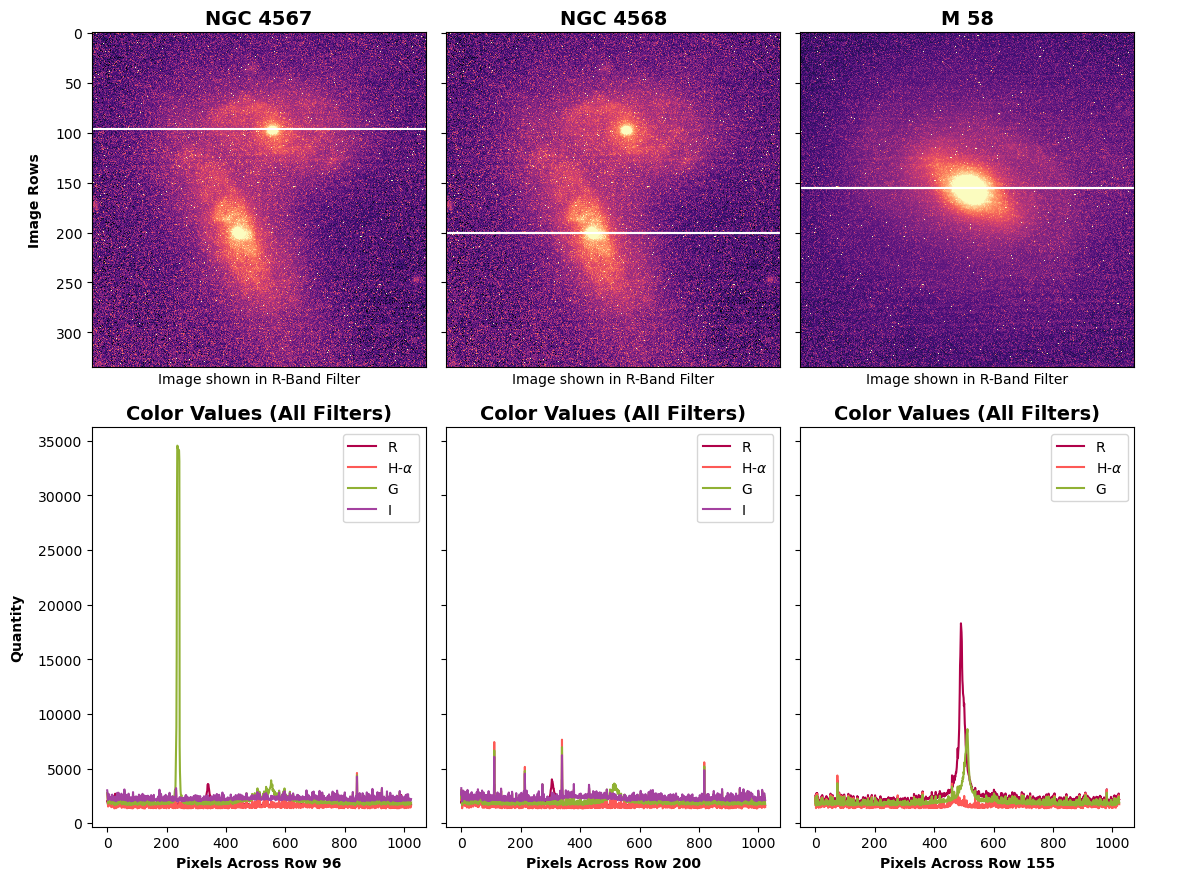

In [61]:
xdim = (-1, 1054)


from matplotlib.patches import Rectangle
fig, axs = plt.subplots(2, 3, figsize=(12, 9), tight_layout=True, sharey='row')

'''
Setting dimensions and plotting for NGC 4567 (top) first --------------------------------------------------
'''
ydim = (96, 96)
xst, xend = xdim
yst, yend = ydim
width = xend - xst
height = yend - yst

axs[0, 0].set_title(
    'NGC 4567', 
            fontsize=14, weight='bold')
border = Rectangle((xst, yst), width, height, edgecolor='white', facecolor='none', lw=1.5);
axs[0, 0].imshow(unc_pair['r'][360:695, 160:495], cmap='magma', norm=phan(unc_pair['r']).normalizer(), interpolation='hermite')
# for some reason it's [y:y, x:x] instead of [x:x, y:y]
axs[0, 0].add_patch(border) 
axs[0, 0].set_xticks([]);
axs[0, 0].set_xlabel('Image shown in R-Band Filter');
axs[0, 0].set_ylabel('Image Rows', weight='bold', labelpad=10);

axs[1, 0].set_title(
    'Color Values (All Filters)', 
              fontsize=14, fontweight='bold')
axs[1, 0].plot(unc_pair['r'][456], label='R', color='xkcd:raspberry');
axs[1, 0].plot(unc_pair['ha'][456], label=f'H-$\\alpha$', color='xkcd:grapefruit');
axs[1, 0].plot(unc_pair['g'][456], label='G', color='xkcd:avocado');
axs[1, 0].plot(unc_pair['i'][456], label='I', color='xkcd:ugly purple');

axs[1, 0].legend(loc='upper right')
axs[1, 0].set_xlabel(f'Pixels Across Row {yst}', weight='bold')
axs[1, 0].set_ylabel('Quantity', weight='bold', labelpad=10);

'''
Setting dimensions and plotting for NGC 4568 (bottom) second --------------------------------------------------
'''
ydim = (200, 200)
xst, xend = xdim
yst, yend = ydim
width = xend - xst
height = yend - yst

axs[0, 1].set_title(
    'NGC 4568', 
            fontsize=14, weight='bold')
border = Rectangle((xst, yst), width, height, edgecolor='white', facecolor='none', lw=1.5);
axs[0, 1].imshow(unc_pair['r'][360:695, 160:495], cmap='magma', norm=phan(unc_pair['r']).normalizer(), interpolation='hermite')
axs[0, 1].add_patch(border)
axs[0, 1].set_xticks([]);
axs[0, 1].set_xlabel('Image shown in R-Band Filter');

axs[1, 1].set_title(
    'Color Values (All Filters)', 
              fontsize=14, fontweight='bold')
axs[1, 1].plot(unc_pair['r'][560], label='R', color='xkcd:raspberry');
axs[1, 1].plot(unc_pair['ha'][560], label=f'H-$\\alpha$', color='xkcd:grapefruit');
axs[1, 1].plot(unc_pair['g'][560], label='G', color='xkcd:avocado');
axs[1, 1].plot(unc_pair['i'][560], label='I', color='xkcd:ugly purple');

axs[1, 1].legend(loc='upper right')
axs[1, 1].set_xlabel(f'Pixels Across Row {yend}', weight='bold');


'''
then finally adjusting for M58  ---------------------------------------------------------------------------------
'''
ydim = (155, 155)
xst, xend = xdim
yst, yend = ydim
width = xend - xst
height = yend - yst

axs[0, 2].set_title(
    'M 58',
            fontsize=14, weight='bold')
border = Rectangle((xst, yst), width, height, edgecolor='white', facecolor='none', lw=1.5);
axs[0, 2].imshow(unc_m58['r'][360:695, 325:660], cmap='magma', norm=phan(unc_m58['r']).normalizer(), interpolation='hermite')
axs[0, 2].add_patch(border)
axs[0, 2].set_xticks([]);
axs[0, 2].set_xlabel('Image shown in R-Band Filter');

axs[1, 2].set_title(
    'Color Values (All Filters)', 
              fontsize=14, fontweight='bold')
axs[1, 2].plot(unc_m58['r'][515], label='R', color='xkcd:raspberry');
axs[1, 2].plot(unc_m58['ha'][515], label=f'H-$\\alpha$', color='xkcd:grapefruit');
axs[1, 2].plot(unc_m58['g'][515], label='G', color='xkcd:avocado');

axs[1, 2].legend(loc='upper right')
axs[1, 2].set_xlabel(f'Pixels Across Row {yst}', weight='bold');


# sketch way of adding right padding lol
axs[0, 2].set_ylabel('Pixel Rows', weight='bold', color='white', fontsize=30);
axs[0, 2].yaxis.set_label_position("right");
axs[1, 2].set_ylabel('Magnitude', weight='bold', color='white', fontsize=30);
axs[1, 2].yaxis.set_label_position("right");

'''
ideas: change to 3d surface plot? idk looks cooler
'''

##### calculating magnitudes

In [64]:
# initialize the PhotAnnulus class for NGC 4567
ngc = phan(pair_sfr)
ngc.normalizer() # defaults: interval='ZScale', stretch='Sqrt', pmin=1, pmax=99.75
ngc_snippet, ngc_sources = ngc.sources(xdim=(160, 495), ydim=(360, 695), sigma=3) # defaults: fwhm=4, threshold=5, r_in=10, r_out=20

# getting rid of bad sources & updating the source table
ngc_sources = ngc_sources[~np.isin(ngc_sources['id'], [11, 6, 1])]
ngc.revise(ngc_sources)

ngc_mags, ngc_srctable = ngc.magnitudes([5, 7]) # defaults: sigma=3.0, maxiters=10

Snippet Resolution:  335 x 335 px


In [65]:
# initialize the PhotAnnulus class for M58
m58 = phan(m_sfr)
m58.normalizer() # defaults: interval='ZScale', stretch='Sqrt', pmin=1, pmax=99.75
m_snippet, m_sources = m58.sources(xdim=(325, 660), ydim=(360, 695), sigma=4, threshold=6) # defaults: fwhm=4, threshold=5, r_in=10, r_out=20

m_mags, m_srctable = m58.magnitudes([7]) # defaults: sigma=3.0, maxiters=10

Snippet Resolution:  335 x 335 px


In [66]:
print(f'[Magnitudes of Interacting Pair] \nNGC 4567: {ngc_mags[0][1]:.2f} \nNGC 4568: {ngc_mags[1][1]:.2f} \n')
print(f'[Magnitude of Non-Interacting Galaxy] \nM58: {m_mags[0][1]:.2f}')

[Magnitudes of Interacting Pair] 
NGC 4567: -14.20 
NGC 4568: -12.41 

[Magnitude of Non-Interacting Galaxy] 
M58: -6.39


##### sfr histogram comparison

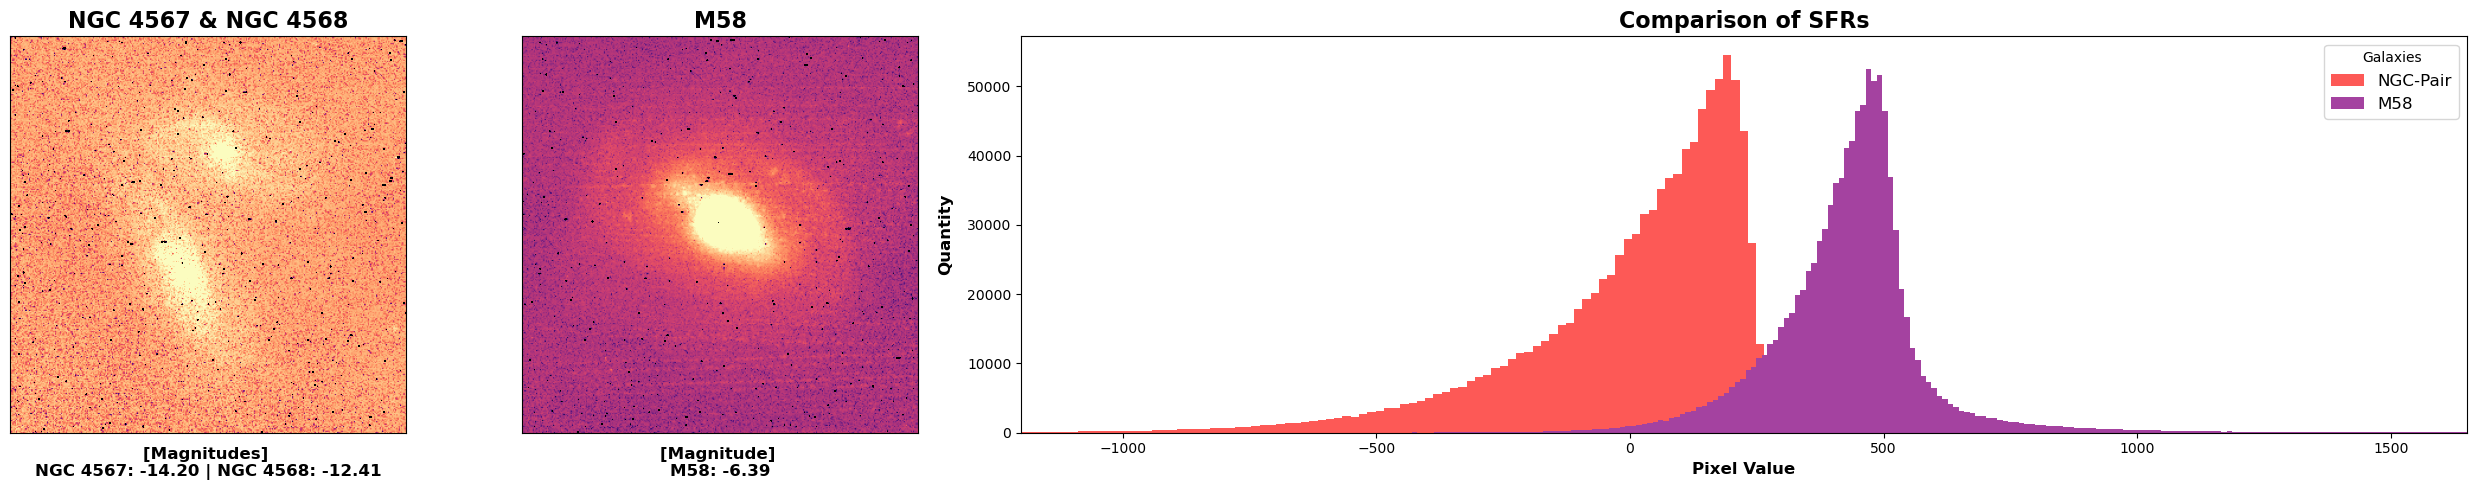

In [108]:
fig = plt.figure(figsize=(25, 5), tight_layout=False);
gs = GridSpec(1, 5, figure=fig)

ax1 = fig.add_subplot(gs[0, 0]);
ax1.set_title(
    'NGC 4567 & NGC 4568', 
              fontsize=16, fontweight='bold');
ax1.imshow(ngc_snippet, cmap='magma', norm=ngc.normalizer(), interpolation='hermite');
ax1.set_xlabel(f'[Magnitudes] \nNGC 4567: {ngc_mags[0][1]:.2f} | NGC 4568: {ngc_mags[1][1]:.2f}', fontsize=12, fontweight='bold', labelpad=10)
ax1.set_xticks([]);
ax1.set_yticks([]);

ax2 = fig.add_subplot(gs[0, 1:2]);
ax2.set_title(
    'M58', 
              fontsize=16, fontweight='bold');
ax2.imshow(m_snippet, cmap='magma', norm=m58.normalizer(), interpolation='hermite');
ax2.set_xlabel(f'[Magnitude] \nM58: {m_mags[0][1]:.2f}', fontsize=12, fontweight='bold', labelpad=10)
ax2.set_xticks([]);
ax2.set_yticks([]);

ax3 = fig.add_subplot(gs[0, 2:]);
ax3.set_title(
    'Comparison of SFRs', 
              fontsize=16, fontweight='bold');
ax3.hist((unc_pair['r']-unc_pair['ha']).flatten(), bins=len(np.unique((unc_pair['r']-unc_pair['ha']).flatten()))+1, label='NGC-Pair', color='xkcd:grapefruit');
ax3.hist((unc_m58['r']-unc_m58['ha']).flatten(), bins=len(np.unique((unc_m58['r']-unc_m58['ha']).flatten()))+1, label='M58', color='xkcd:ugly purple');
ax3.set_xlim(-1200, 1650);
ax3.set_xlabel('Pixel Value', fontsize=12, fontweight='bold');
ax3.set_ylabel('Quantity', fontsize=12, fontweight='bold', labelpad=10);
ax3.legend(title='Galaxies', loc='upper right', fontsize=12);

fig.subplots_adjust(wspace=0.1)